### [Train your first neural network: basic classification](https://www.tensorflow.org/tutorials/keras/basic_classification)

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

1.12.0


#### Import [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


Each image is mapped to a single label. Since the _class names_ are not included with the dataset, we will store them in a list!

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### A thing or two about the data

In [6]:
# 60000 images for training, each image represented as 28 x 28 pixels

train_images.shape

(60000, 28, 28)

In [9]:
# (obviously) 60000 labels in the training set
# Each label is an integer between 0 and 9

len(train_labels)

60000

In [11]:
# 10000 images (represented as 28 x 28 pixels) for testing

test_images.shape

(10000, 28, 28)

In [12]:
# Likewise, 10000 labels in the testing set

len(test_labels)

10000

#### It's time for some preprocessing

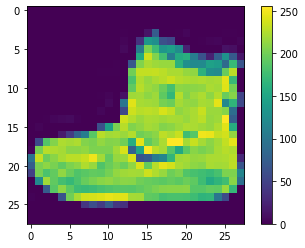

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

It looks like each pixel values fall in the range of 0 to 255.<br/>
We scale these values to a range of 0 and 1 before feeding to the neural network model.

In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Let's take a look at first 25 images along with its corresponding class names!

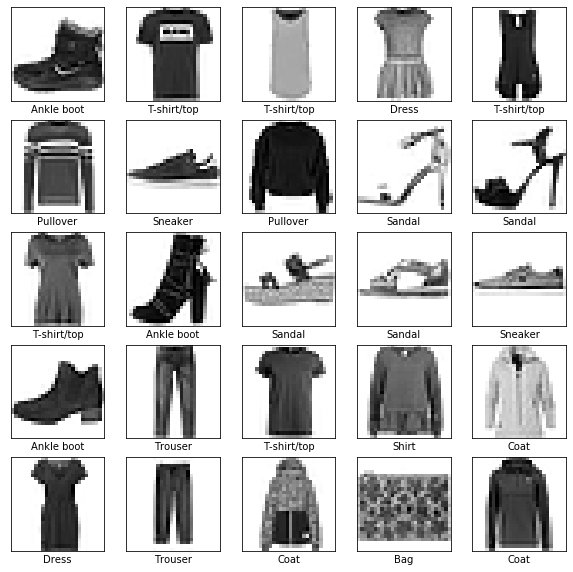

In [24]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Setup the layers
The first layer in this network, **Flatten** transforms the image pixels from a 2d-array to a 1d-array.<br/>
After the pixels are flattened, the network has a sequence of two **Dense** layers:
1. The first **Dense** layer consists of 128 neurons,
2. The second layer is a 10-node _softmax_ layer which returns an array of 10 probability scores that sums to 1.

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#### Compile the model
Before starting the training of the model, it needs a few more settings which are added during the model's _compile_ step:
* **Optimizer**: How model is optimized based on the data it sees and its loss function,
* **Loss function**: How accurate the model is during training,
* **Metrics**: Used to monitor the training and testing steps.

In [32]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#### Training

In [33]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.5001 - acc: 0.8240
Epoch 2/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.3738 - acc: 0.8646
Epoch 3/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.3353 - acc: 0.8770
Epoch 4/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.3127 - acc: 0.8851
Epoch 5/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.2942 - acc: 0.8913
Epoch 6/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.2793 - acc: 0.8975
Epoch 7/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.2675 - acc: 0.8997
Epoch 8/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.2552 - acc: 0.9045
Epoch 9/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.2461 - acc: 0.9081
Epoch 10/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.2355 -

#### Evaluation

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: {}\nTest loss: {:.4f}'.format(test_acc, test_loss))

10000/10000 [==============================] - 1s 55us/step
Test accuracy: 0.8805
Test loss: 0.3429


#### Let's make some predictions

In [37]:
predictions = model.predict(test_images)

In [38]:
predictions[0]

array([1.0976762e-06, 9.5380397e-09, 1.4443818e-07, 2.1417293e-11,
       3.5414876e-06, 3.2313769e-03, 2.1581211e-06, 1.1190384e-02,
       4.3137402e-07, 9.8557079e-01], dtype=float32)

In [39]:
np.argmax(predictions[0])

9

In [40]:
test_labels[0]

9

#### Let's graph this for better understanding

In [98]:
def plot_image(i, predictions, true_label, img):
    predictions_array, true_label, img = predictions, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

In [99]:
def plot_value_array(i, predictions, true_label):
    predictions_array, true_label = predictions, true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

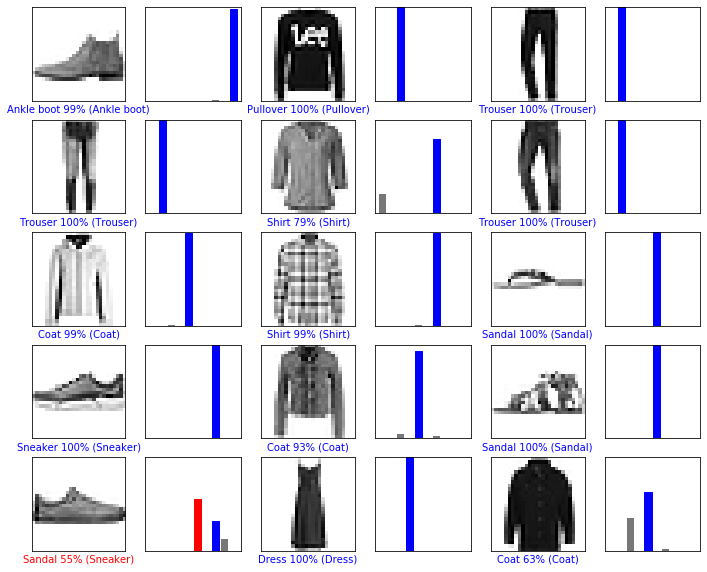

In [100]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.show()

#### Using trained model to make a prediction about a single image

In [104]:
i = 45

In [112]:
img = test_images[i]
print('Actual label: {}'.format(class_names[test_labels[i]]))

Actual label: Sneaker


Since, _keras_ models are optimized to make predictions on a batch of examples at once, we need to add our single image to a list!

In [106]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [107]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.0431105e-06 9.2754563e-06 1.9855493e-06 5.8586971e-07 6.6170392e-06
  1.8902963e-02 8.1166456e-07 8.8417482e-01 3.4584682e-05 9.6866332e-02]]


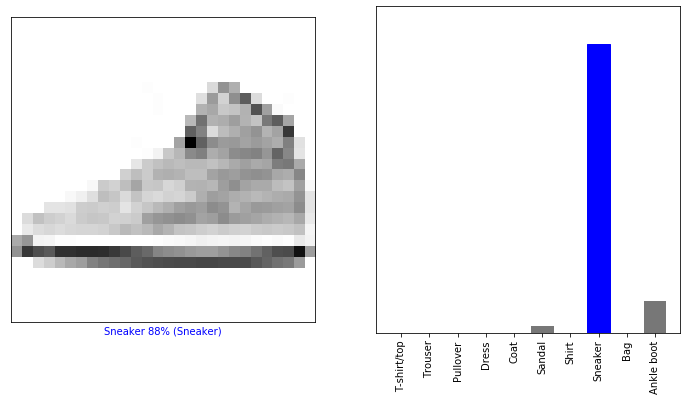

In [108]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plot_image(i, predictions_single[0], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions_single[0], test_labels)
plt.xticks(range(10), class_names, rotation=90)

plt.show()